In [2]:
# %load k_means_cluster.py
#!/usr/bin/python 

""" 
    Skeleton code for k-means clustering mini-project.
"""




import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

In [3]:
%matplotlib inline
def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

In [4]:
### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [5]:
### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )

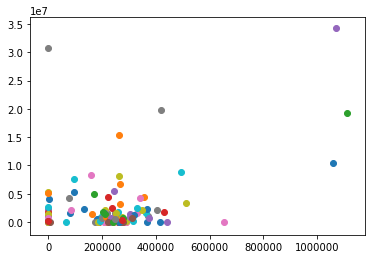

In [6]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter( f1, f2 )
plt.show()


In [8]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(finance_features)
pred = kmeans.predict(finance_features)

In [9]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


In [10]:
#Add a third feature to features_list, "total_payments". Now rerun clustering, using 3 input features instead of 2. 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = 'total_payments'
poi  = "poi"
features_list_new = [poi, feature_1, feature_2, feature_3]
data_new = featureFormat(data_dict, features_list_new )
poi, finance_features_new = targetFeatureSplit( data_new )

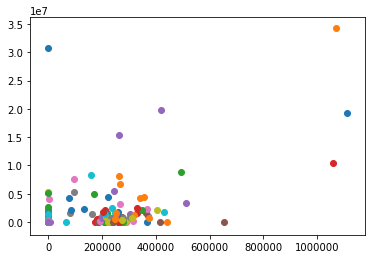

In [11]:
### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
for f1, f2, _ in finance_features_new:
    plt.scatter( f1, f2 )
plt.show()


In [13]:
### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans
kmeans_3clusters = KMeans(n_clusters = 3)
kmeans_3clusters.fit(finance_features_new)
pred_new = kmeans_3clusters.predict(finance_features_new)

In [14]:
### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred_new, finance_features_new, poi, mark_poi=False, name="clusters_n3.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


In [18]:
#What are the maximum and minimum values taken by the “exercised_stock_options” feature used in this example?
exercised_stock_options = []
for key, value in data_dict.iteritems():
    exercised_stock_options.append(value['exercised_stock_options'])
exercised_stock_options_without_NaN = [i for i in exercised_stock_options if i != 'NaN']
print "maximum exercised_stock_options:", max(exercised_stock_options_without_NaN)
print "minimum exercised_stock_options:", min(exercised_stock_options_without_NaN)

maximum exercised_stock_options: 34348384
minimum exercised_stock_options: 3285


In [20]:
#What are the maximum and minimum values taken by“salary"?
salaries = []
for key, value in data_dict.iteritems():
    salaries.append(value['salary'])
salaries_without_NaN = [j for j in salaries if j != 'NaN']
print "maximum salary:", max(salaries_without_NaN)
print "minimum salary:", min(salaries_without_NaN)

 maximum salary: 1111258
minimum salary: 477
